In [20]:
import random
import numpy as np

In [21]:
import xgi
import cProfile

# H = xgi.load_xgi_data("email-enron")

In [1]:
c = list()
c.extend(1)

TypeError: 'int' object is not iterable

In [46]:
H = xgi.load_xgi_data("hospital-lyon", max_order=3)

In [47]:
I = xgi.incidence_matrix(H, sparse=False)

array([2, 2, 2, ..., 2, 2, 2])

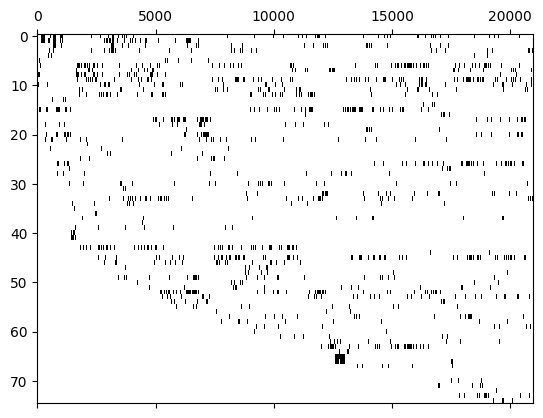

In [51]:
import matplotlib.pyplot as plt

plt.spy(I, aspect="auto")

In [42]:
H.num_edges

2945

In [16]:
-np.inf * 0

nan

In [15]:
import numpy as np

-np.inf > 0

False

In [53]:
def metropolis_hastings(f, support, num_samples, burn_in, skip):
    min_val = max(support[0], -100)
    max_val = min(support[1], 100)
    x = random.uniform(min_val, max_val)
    width = max_val - min_val
    states = []
    for i in range(burn_in + num_samples * skip):
        states.append(x)
        xp = random.uniform(
            max(x - 0.1 * width, min_val), min(x + 0.1 * width, max_val)
        )

        curr_prob = f(x)
        new_prob = f(xp)

        inv_curr_prob = min(x + 0.1 * width, max_val) - max(x - 0.1 * width, min_val)
        inv_new_prob = min(xp + 0.1 * width, max_val) - max(xp - 0.1 * width, min_val)

        acceptance = min(new_prob / curr_prob * inv_curr_prob / inv_new_prob, 1)
        if random.random() < acceptance:
            x = xp
    return states[burn_in::skip]

In [60]:
x = metropolis_hastings(lambda x: np.exp(-(x**2)), [-np.inf, np.inf], 1000, 100, 100)

/var/folders/18/v8kqhtv16cl5085d0dv0hj8c0000gn/T/ipykernel_54404/611734668.py:17: RuntimeWarning: invalid value encountered in double_scalars
  acceptance = min(new_prob/curr_prob*inv_curr_prob/inv_new_prob,1)


In [61]:
import matplotlib.pyplot as plt

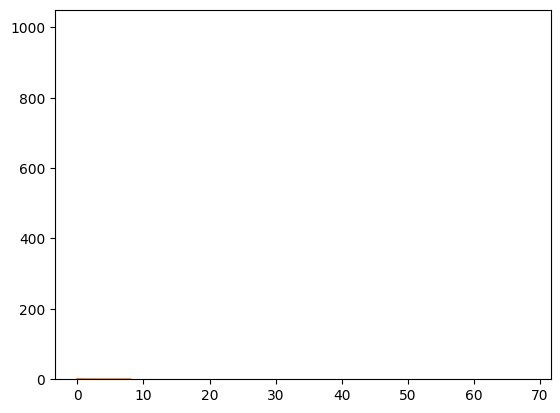

In [62]:
plt.hist(x, bins=100)
plt.plot(np.linspace(0, 8, 100), np.exp(-np.linspace(0, 8, 100)))
plt.show()

[100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 320,
 330,
 340,
 350,
 360,
 370,
 380,
 390,
 400,
 410,
 420,
 430,
 440,
 450,
 460,
 470,
 480,
 490,
 500,
 510,
 520,
 530,
 540,
 550,
 560,
 570,
 580,
 590,
 600,
 610,
 620,
 630,
 640,
 650,
 660,
 670,
 680,
 690,
 700,
 710,
 720,
 730,
 740,
 750,
 760,
 770,
 780,
 790,
 800,
 810,
 820,
 830,
 840,
 850,
 860,
 870,
 880,
 890,
 900,
 910,
 920,
 930,
 940,
 950,
 960,
 970,
 980,
 990]

In [ ]:
def sample_weighted_beta(weights, indicators):
    f = lambda theta: np.power((1 - theta * weights), indicators) * np.power(theta * weights, np.where(indicators == False, dtype=int))
    accept = False
    while not accept:
        

In [63]:
from scipy.stats import beta

In [65]:
x = beta(40, 20).rvs(10000)

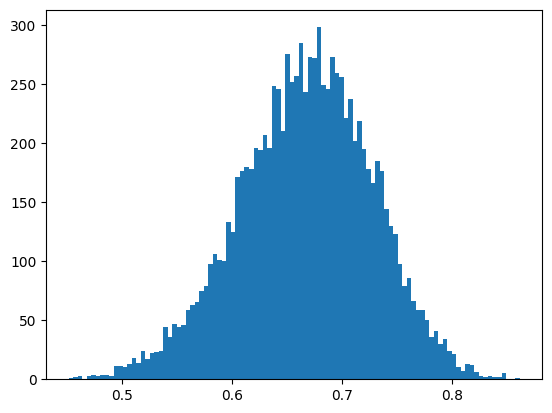

In [67]:
plt.hist(x, bins=100)
plt.show()